# CREDIT CARD FRAUD DETECTION SYSTEM

## importing all the libraries needed

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For Data Viz. 
import matplotlib.pyplot as plt 
import seaborn as sns 

# For Warnings. 
import warnings 
warnings.filterwarnings('ignore')

# Setting up options. 
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns',None)

# For Scaling 
from sklearn.preprocessing import StandardScaler 

# Train-Test Splitting. 
from sklearn.model_selection import train_test_split 

# For Pipelines 
from sklearn.pipeline import Pipeline 

# Model Building 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.svm import SVC , LinearSVC 

# Metric Evaluation. 
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# About dataset

In [2]:
data_import = pd.read_csv('D:\Machine Learning\Credit Card Fraud Detection System\creditcard_2023.csv')
data_import.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

 ## setting dataframe, features and training & testing factors for model

In [4]:
df = data_import.drop('id' , axis = 1)

In [5]:
features = df.drop('Class' , axis = 1)
label = df['Class']

In [6]:
x_train , x_test , y_train , y_test = train_test_split(features , label , test_size = 0.2 , stratify = label , random_state = 42)
print(f"x train shape : {x_train.shape}\ny train shape : {y_train.shape}\nx test shape : {x_test.shape}\ny test shape : {y_test.shape}")

x train shape : (454904, 29)
y train shape : (454904,)
x test shape : (113726, 29)
y test shape : (113726,)


# Training the model

In [7]:
lr_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()),
    ('Logistic Regression' , LogisticRegression())
])

tree_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()),
    ('Decision Tree' , DecisionTreeClassifier())
])

forest_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()),
    ('Random Forest' , RandomForestClassifier()) 
])

ada_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()),
    ('AdaBoost' , AdaBoostClassifier())
])

gradient_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()),
    ('Gradient Boosting' , GradientBoostingClassifier())
])

svc_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()),
    ('Support Vector Machines', SVC())
])


linear_svc_pipe = Pipeline(steps = [
    ('Linear Support Vector Machines ' , LinearSVC())
])

In [8]:
main_pipeline = [lr_pipe , tree_pipe , forest_pipe , ada_pipe , gradient_pipe , svc_pipe , linear_svc_pipe]
Models = ['Logistic Regression Classifier', 'Decision Tree Classifier' , 'Random Forest Classifier' , 'AdaBoosting Classifier' , 'Gradient Boosting Classifier' , 'SVC Classifier' , 'Linear SVC Classifier']

In [ ]:
for pipe in main_pipeline : 
    pipe.fit(x_train , y_train)

# All the tests Accuracy Score

In [ ]:
for index,val in enumerate(main_pipeline) : 
    print(f"{main_pipeline[index]} , test scoree : {val.score(x_test,y_test)}")

Pipeline(steps=[('scaler', StandardScaler()),
                ('Logistic Regression', LogisticRegression())]) , test scoree : 0.9649596398360973
Pipeline(steps=[('scaler', StandardScaler()),
                ('Decision Tree', DecisionTreeClassifier())]) , test scoree : 0.9976962172238538
Pipeline(steps=[('scaler', StandardScaler()),
                ('Random Forest', RandomForestClassifier())]) , test scoree : 0.9998329317834093
Pipeline(steps=[('scaler', StandardScaler()),
                ('AdaBoost', AdaBoostClassifier())]) , test scoree : 0.9695759984524207
Pipeline(steps=[('scaler', StandardScaler()),
                ('Gradient Boosting', GradientBoostingClassifier())]) , test scoree : 0.9792923342067777
Pipeline(steps=[('scaler', StandardScaler()),
                ('Support Vector Machines', SVC())]) , test scoree : 0.9970807027416774
Pipeline(steps=[('Linear Support Vector Machines ', LinearSVC())]) , test scoree : 0.7463904472152366


since random forest has maximum accuracy

In [ ]:
y_pred = forest_pipe.predict(x_test)
print(f"Accuracy Score using Random Forest Classifier : {accuracy_score(y_test,y_pred)}")

Accuracy Score using Random Forest Classifier : 0.9998329317834093


# Confusion Matrix

Text(33.0, 0.5, 'Actual Values')

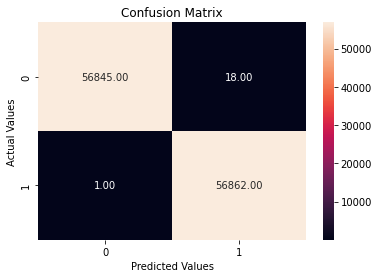

In [ ]:
matrix = confusion_matrix(y_test , y_pred)

sns.heatmap(matrix , annot = True , fmt = '0.2f')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [ ]:
print(f"Classification Report : {classification_report(y_test , y_pred)}")

Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

